# TRANSER LEARNING IMPLEMENTATION USING TENSORFLOW AND KERAS

- in this notebook we will implement transfer learning using the ResNet50 pretrained model, since this model is trained on the imagenet dataset, it should be able to learn fruits and vegetables patterns quite easy.

**we used Tensorboard to keep track on how the model performed during the training phase, if you are Using Jupyter to run this notebook make sure to install tensorboard in your virtual enviroment**

In [ ]:
# first let's import the basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# now we will grab a dataset from Github containing data of images containing fruits and vegetables
import os
import zipfile

In [ ]:
!wget --no-check-certificate \
    'https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip'\
    -O '/tmp/veggies_n_fruits.zip'

zip_ref = zipfile.ZipFile('/tmp/veggies_n_fruits.zip', 'r') 
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-08-20 01:45:38--  https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2021-08-20 01:45:39--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/veggies_n_fruits.zip’

/tmp/veggies_n_frui     [             <=>    ] 761.30M  12.6MB/s    in 45s     

2021-08-20 01:46:24 (16.9 MB/s) - ‘/tmp/veggies_n_fruits.zip’ saved [798281939]



In [ ]:
test_path = '/tmp/Fruit-Images-Dataset-master/Test'
train_path = '/tmp/Fruit-Images-Dataset-master/Training'

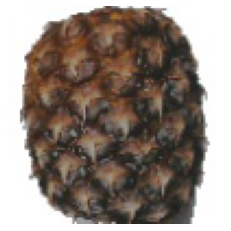

In [ ]:
#let's try and open an image using TensorfLow's tools
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img(train_path +'/Pineapple/100_100.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img = img_to_array(img)
print(img.shape)

INPUT_SHAPE = img.shape

(100, 100, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.5,
                             horizontal_flip=True,
                             vertical_flip=True,
                             preprocessing_function=preprocess_input)
# test_data = ImageDataGenerator(rescale=1/255)

In [ ]:
train_gen = train_data.flow_from_directory(train_path, 
                                           target_size=(100,100), 
                                           batch_size=32,color_mode='rgb',
                                           class_mode='categorical')
test_gen = train_data.flow_from_directory(test_path, 
                                          target_size=(100,100), 
                                          batch_size=32,
                                          class_mode='categorical',color_mode='rgb')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
# this will be needed later on
train_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [ ]:

IMG_SIZE = INPUT_SHAPE[0:2]
EPOCHS = 10
BATCH_SIZE = 32

In [ ]:
#load the pretrained model

resnet = ResNet50(include_top=False,weights='imagenet',
                  input_shape=INPUT_SHAPE)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# freezing the layers

for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# add the prediction layers
# the number of classes is 131

x = Flatten()(resnet.output)

pred = Dense(131,activation='softmax')(x)


model = Model(inputs=resnet.inputs, outputs=pred)

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# steps per epoch for the training set

training_spe = int(train_gen.n// BATCH_SIZE)

#steps per epoch for validation set
val_spe = int(test_gen.n//BATCH_SIZE)

print(f'''
steps per epoch(training):{training_spe}
steps per epoch(test): {val_spe}
number of epochs:{EPOCHS}
batch size: {BATCH_SIZE}
''')


steps per epoch(training):2115
steps per epoch(test): 709
number of epochs:10
batch size: 32



In [ ]:
# creating early stopping callback and tensorboard callbacks
import tensorflow as tf
import datetime

log_dir = os.path.join('logs',
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  min_delta=0.03)

In [ ]:
# this magic command loads a tensorboard instance to be loaded later on
%load_ext tensorboard

In [ ]:
#fitting the model

res = model.fit_generator(generator=train_gen,
                          epochs=EPOCHS,
                          steps_per_epoch=training_spe,
                          validation_data=test_gen,
                          validation_steps=val_spe,
                          callbacks=[tensorflow_callback,early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
2115/2115 [==============================] - 323s 138ms/step - loss: 2.1384 - accuracy: 0.8550 - val_loss: 1.9543 - val_accuracy: 0.8904
Epoch 2/10
2115/2115 [==============================] - 285s 135ms/step - loss: 0.6960 - accuracy: 0.9517 - val_loss: 1.5357 - val_accuracy: 0.9181
Epoch 3/10
2115/2115 [==============================] - 285s 135ms/step - loss: 0.5024 - accuracy: 0.9668 - val_loss: 1.4367 - val_accuracy: 0.9300
Epoch 4/10
2115/2115 [==============================] - 299s 141ms/step - loss: 0.3629 - accuracy: 0.9757 - val_loss: 1.4240 - val_accuracy: 0.9368
Epoch 5/10
2115/2115 [==============================] - 283s 134ms/step - loss: 0.3230 - accuracy: 0.9795 - val_loss: 1.0796 - val_accuracy: 0.9489
Epoch 6/10
2115/2115 [==============================] - 282s 134ms/step - loss: 0.2862 - accuracy: 0.9817 - val_loss: 1.0933 - val_accuracy: 0.9488
Epoch 7/10
2115/2115 [==============================] - 283s 134ms/step - loss: 0.2491 - accuracy: 0.9838 - val_

In [ ]:
%tensorboard --logdir logs

In [ ]:
#now i'll save my model to use it on a project that uses OpenCV to detect fruits and vegetables

model.save('Veggies_n_fruits_nn.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Notebook made by: **Luis Felipe Urena Hernandez**
                        *Data Scientist/ML Engineer*

PACKAGE VERSIONS USED IN THIS NOTEBOOK:
```
Tensorflow Version: 2.6.0
Numpy Version: 1.19.5
Pandas Version: 1.1.5
Matplotlib Version: 3.2.2
```

    